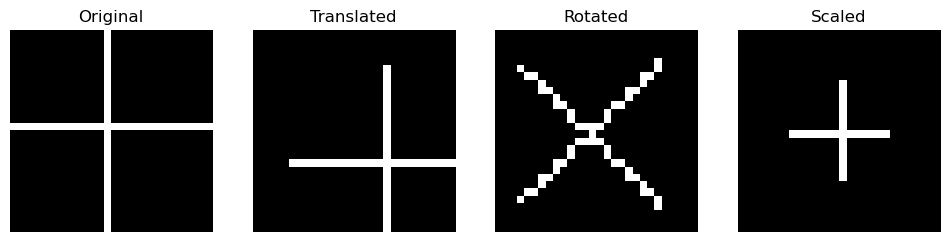

In [3]:

import matplotlib.pyplot as plt
from utils import *

# Create a simple 28x28 image with a basic shape (e.g., a cross)
image = np.zeros((28, 28))
image[13, :] = 255  # Horizontal line
image[:, 13] = 255  # Vertical line

# Define transformation matrices for translation, rotation, and scaling
tx, ty = 5, 5  # Translation vector
theta = np.radians(45)  # Rotation angle
sx, sy = 0.5, 0.5  # Scaling factors

translation_matrix = np.array([[1, 0, tx], [0, 1, ty], [1, 0, 1]])
rotation_matrix = np.array([[np.cos(theta), -np.sin(theta), 0], [np.sin(theta), np.cos(theta), 0], [0, 0, 1]])
scaling_matrix = np.array([[sx, 0, 0], [0, sy, 0], [0, 0, 1]])

projection_matrix = scaling_matrix @ rotation_matrix @ [[np.eye(2), np.zeros((2,1))], []]


# Apply transformations
translated_image = apply_transformation(image, translation_matrix)
rotated_image = apply_transformation(image, rotation_matrix)
scaled_image = apply_transformation(image, scaling_matrix)

# Plot results
fig, axes = plt.subplots(1, 4, figsize=(12, 3))
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original')
axes[0].axis('off')

axes[1].imshow(translated_image, cmap='gray')
axes[1].set_title('Translated')
axes[1].axis('off')

axes[2].imshow(rotated_image, cmap='gray')
axes[2].set_title('Rotated')
axes[2].axis('off')

axes[3].imshow(scaled_image, cmap='gray')
axes[3].set_title('Scaled')
axes[3].axis('off')

plt.show()


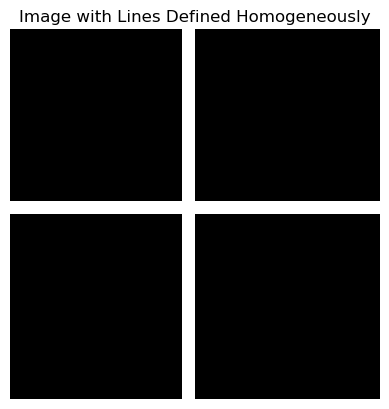

In [11]:
def set_line(img, coefficients):
    a, b, c = coefficients
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            if abs(a*x + b*y + c) < 1:  # Adjust this threshold as needed
                img[x, y] = 255

# Initialize a blank image
image = np.zeros((28, 28))

# Horizontal line coefficients (y = 13)
# x + 0*y - 13 = 0  -> 0x + 1y - 13 = 0 in homogeneous form is represented as [0, 1, -13]
horizontal_line = [0, 1, -13]

# Vertical line coefficients (x = 13)
# 1x + 0*y - 13 = 0 -> 1x + 0y - 13 = 0 in homogeneous form is represented as [1, 0, -13]
vertical_line = [1, 0, -13]

# Set lines on the image using homogeneous coordinates
set_line(image, horizontal_line)
set_line(image, vertical_line)

# Now, image can be transformed and plotted as before
plt.imshow(image, cmap='gray')
plt.title('Image with Lines Defined Homogeneously')
plt.axis('off')
plt.show()
